In [9]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv('hospital_diabetes_dataset.csv')

In [24]:
data.head()

,Pregnancies,AmountofGlucose,Pressureofblood,Thicknessofskin,amountofInsulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
data.shape

(768, 9)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       768 non-null    int64  
 1   AmountofGlucose   768 non-null    int64  
 2   Pressureofblood   768 non-null    int64  
 3   Thicknessofskin   768 non-null    int64  
 4   amountofInsulin   768 non-null    int64  
 5   BMI               768 non-null    float64
 6   DiabetesPedigree  768 non-null    float64
 7   Age               768 non-null    int64  
 8   Outcome           768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [29]:
print ('Rows     : ', data.shape[0])
print ('Columns  : ', data.shape[1])

Rows     :  768
Columns  :  9


In [31]:
data.isnull().sum()


Pregnancies         0
AmountofGlucose     0
Pressureofblood     0
Thicknessofskin     0
amountofInsulin     0
BMI                 0
DiabetesPedigree    0
Age                 0
Outcome             0
dtype: int64

In [32]:
print ('\nMissing values :  ', data.isnull().sum().values.sum())


Missing values :   0


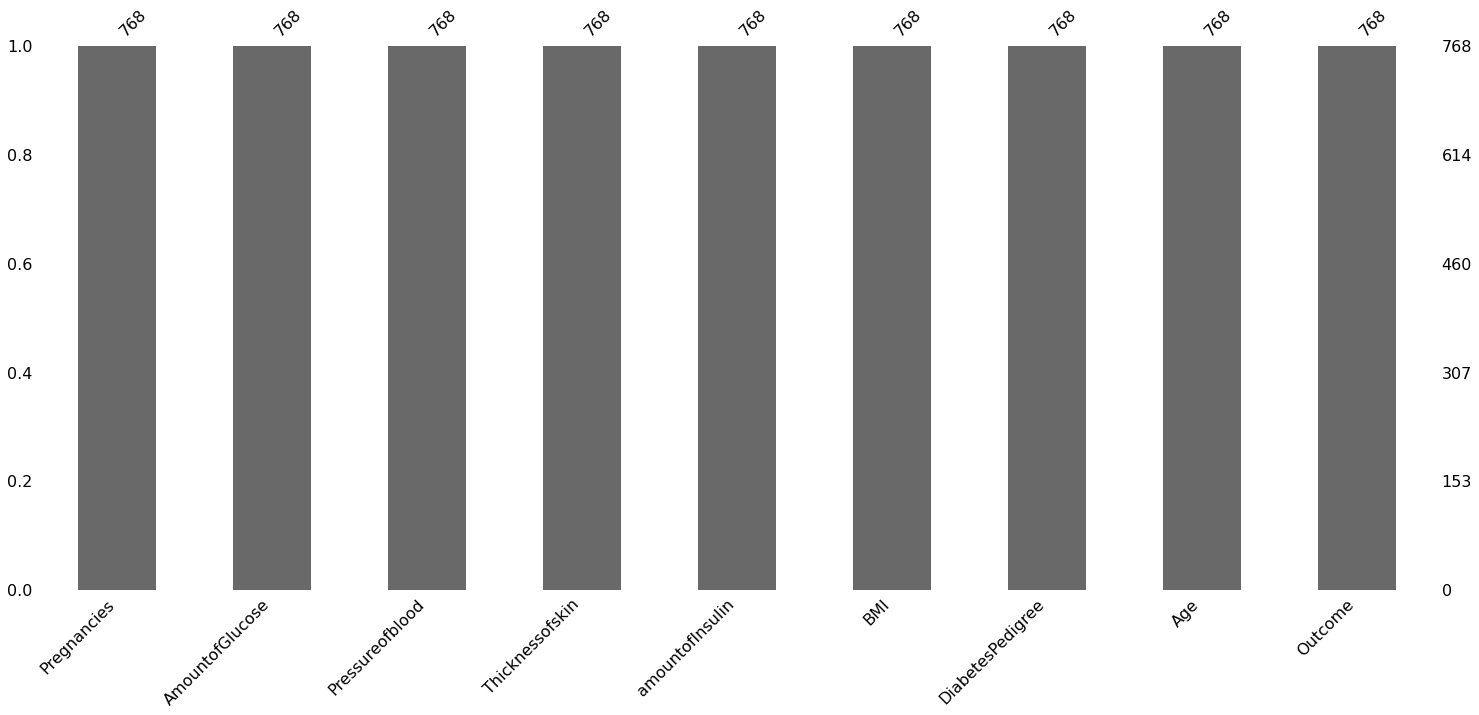

In [62]:
import missingno as msno
msno.bar(data)

In [28]:
print ('\nUnique values :  \n', data.nunique())


Unique values :  
 Pregnancies          17
AmountofGlucose     136
Pressureofblood      47
Thicknessofskin      51
amountofInsulin     186
BMI                 248
DiabetesPedigree    517
Age                  52
Outcome               2
dtype: int64


In [33]:
data.describe()

,Pregnancies,AmountofGlucose,Pressureofblood,Thicknessofskin,amountofInsulin,BMI,DiabetesPedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [34]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [35]:
data["Outcome"].value_counts()*100/len(data)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

Text(0.5, 1.0, 'Diabetes Outcome')

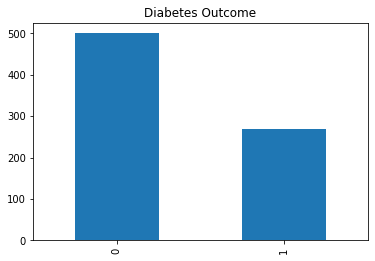

In [37]:
data['Outcome'].value_counts().plot(kind='bar').set_title('Diabetes Outcome')

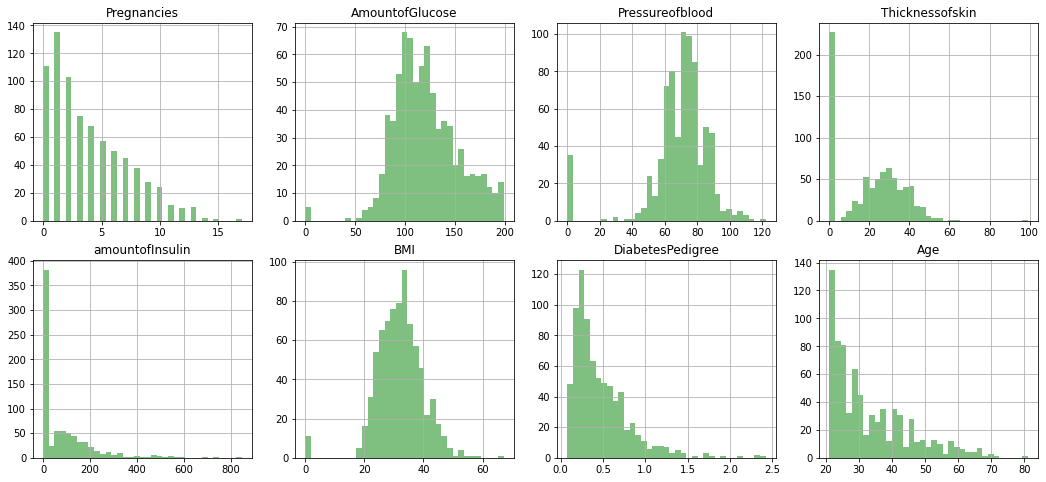

In [55]:
features = ['Pregnancies', 'AmountofGlucose', 'Pressureofblood', 'Thicknessofskin', 'amountofInsulin', 'BMI', 'DiabetesPedigree', 'Age']
ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
    data[feature].hist(bins=35, color='green', alpha=0.5, ax=ax[row, col]).set_title(feature)  

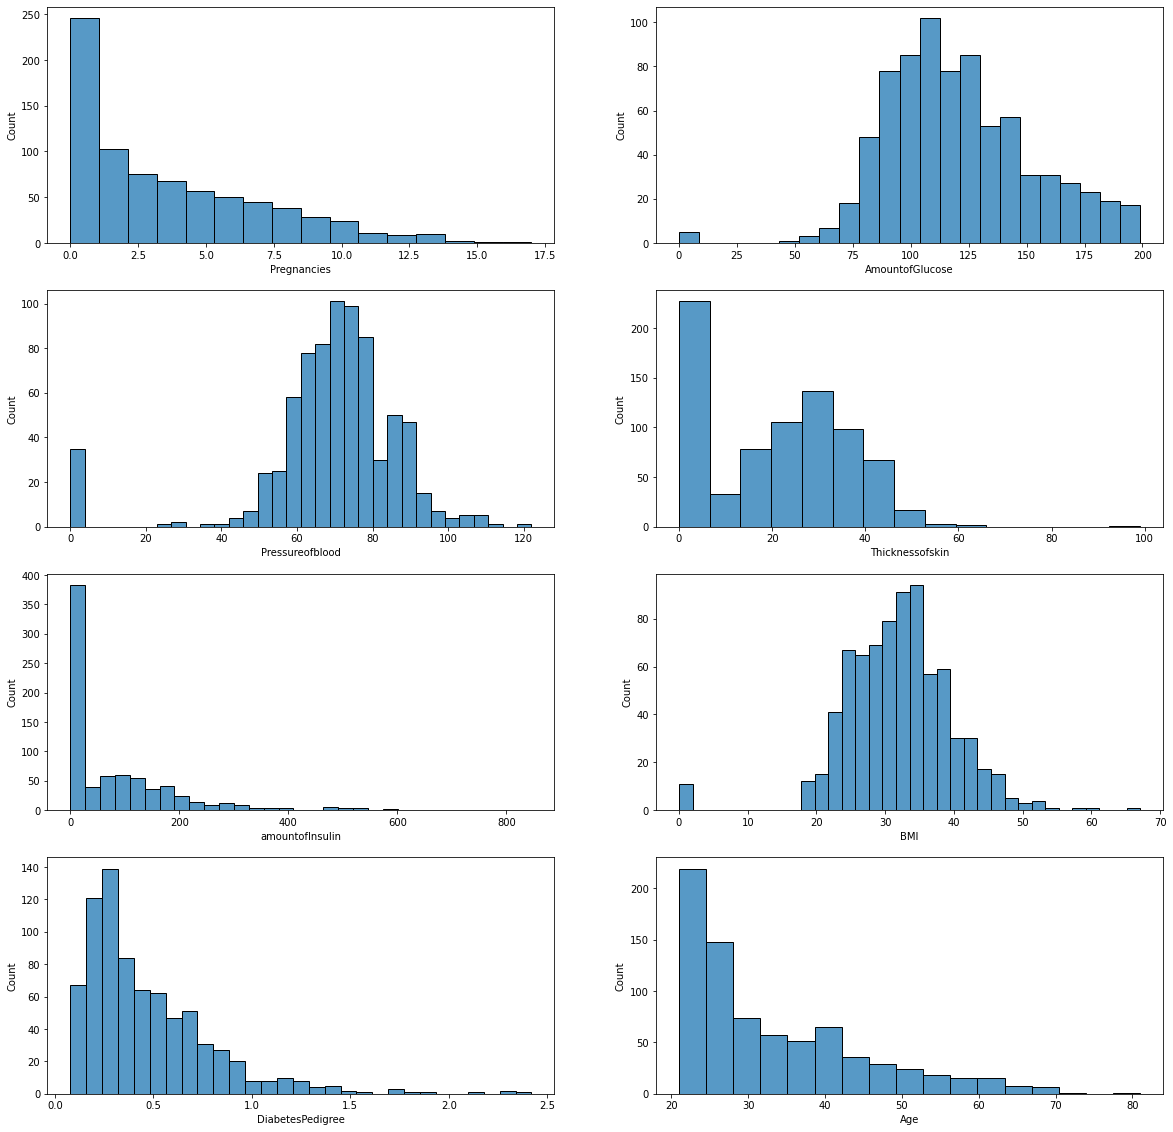

In [57]:
fig=plt.figure(figsize=(20,20))
for i,col in enumerate(data.drop(['Outcome'],axis=1)):
    ax=fig.add_subplot(4,2,i+1)
    sns.histplot(data[col])

In [59]:
from collections import Counter
def detect_outliers(data,n,features):
    outlier_indices = []
    for col in features:
        Q1 = np.percentile(data[col], 25)
        Q3 = np.percentile(data[col],75)
        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR
        
        outlier_list_col = data[(data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step )].index
        
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

outliers_to_drop = detect_outliers(data, 2 ,['Pregnancies', 'AmountofGlucose', 'Pressureofblood', 'Thicknessofskin', 'amountofInsulin', 'BMI', 'DiabetesPedigree', 'Age'])

In [60]:
data.drop(data.loc[outliers_to_drop].index, inplace=True)

In [61]:
data.corr()

,Pregnancies,AmountofGlucose,Pressureofblood,Thicknessofskin,amountofInsulin,BMI,DiabetesPedigree,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
AmountofGlucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pressureofblood,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Thicknessofskin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
amountofInsulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [63]:
y = data["Outcome"].values
X = data.drop(["Outcome"], axis = 1)

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split

In [66]:
def evaluate_model(models):
    kfold = StratifiedKFold(n_splits = 10)
    
    result = []
    for model in models :
        result.append(cross_val_score(estimator = model, X = x_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

    cv_means = []
    cv_std = []
    for cv_result in result:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())

    result_data = pd.DataFrame({
        "CrossValMeans":cv_means,
        "CrossValerrors": cv_std,
        "Models":[
            "LogisticRegression",
            "DecisionTreeClassifier",
            "AdaBoostClassifier",
            "SVC",
            "RandomForestClassifier",
            "GradientBoostingClassifier",
            "KNeighborsClassifier"
        ]
    })

    bar = sns.barplot(x = "CrossValMeans", y = "Models", data = result_data, orient = "h")
    bar.set_xlabel("Mean Accuracy")
    bar.set_title("Cross validation scores")
    return result_data

,CrossValMeans,CrossValerrors,Models
0,0.776415,0.052924,LogisticRegression
1,0.701922,0.078311,DecisionTreeClassifier
2,0.703704,0.094465,AdaBoostClassifier
3,0.757897,0.046186,SVC
4,0.765199,0.055386,RandomForestClassifier
5,0.763382,0.036022,GradientBoostingClassifier
6,0.720755,0.042671,KNeighborsClassifier


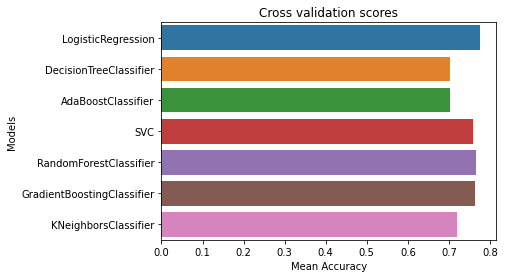

In [71]:
random_state = 42
models = [
    LogisticRegression(random_state = random_state, solver='liblinear'),
    DecisionTreeClassifier(random_state = random_state),
    AdaBoostClassifier(DecisionTreeClassifier(random_state = random_state), random_state = random_state, learning_rate = 0.2),
    SVC(random_state = random_state),
    RandomForestClassifier(random_state = random_state),
    GradientBoostingClassifier(random_state = random_state),
    KNeighborsClassifier(),
]
evaluate_model(models)

In [75]:
model = LogisticRegression().fit(x_train, y_train)
y_pred = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



Text(0.5, 33.0, 'Predicted Values')

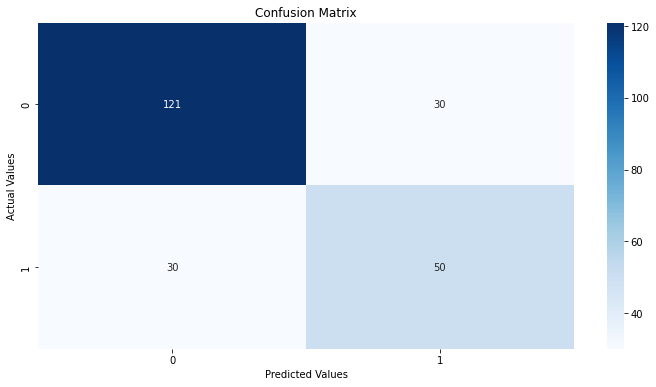

In [79]:
#confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
